The data for this notebook is https://www.kaggle.com/datasets/gchan357/mirna-expression-in-human-lung-cancers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)

## **Load Data and Preprocess Data**

In [1]:
filePath ="/kaggle/input/mirna-expression-in-human-lung-cancers/miRNA_lung.csv"

In [2]:
import pandas as pd
data = pd.read_csv(filePath)

In [3]:
data.head(3)

,depmap_id,cell_line_display_name,lineage_1,lineage_2,lineage_3,lineage_5,lineage_6,lineage_4,MIMAT0000062,MIMAT0000063,...,MIMAT0002192,MIMAT0002191,MIMAT0002190,MIMAT0002189,MIMAT0002188,MIMAT0002187,MIMAT0002186,MIMAT0002185,MIMAT0010151,MIMAT0010150
0,ACH-000382,CORL24,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,14.735474,12.091720,...,6.113534,6.609991,6.308885,6.262471,6.397461,5.966938,5.907852,6.572435,6.230741,6.910133
1,ACH-000187,CORL311,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,14.088938,10.298567,...,5.892877,6.482203,6.258330,6.425761,6.454340,6.050284,5.829088,6.321567,5.973841,6.723558
2,ACH-000695,CORL47,Lung,Lung Neuroendocrine Tumor,Small Cell Lung Cancer,NaN,NaN,NaN,14.802760,12.660535,...,5.856488,6.421728,5.928844,6.166514,6.454669,6.084489,5.831370,6.084489,5.831370,6.735522


In [5]:
data['lineage'] = np.where(data['lineage_2'].str.contains('Non-small', case=False), 'Non-Small Cell', 'Small Cell')

In [6]:
data['lineage'].value_counts()

lineage
Non-Small Cell    119
Small Cell         49
Name: count, dtype: int64

In [7]:
columns_to_remove = ['depmap_id', 'cell_line_display_name', 'lineage_1', 'lineage_2', 'lineage_3', 'lineage_5', 'lineage_6', 'lineage_4']
data = data.drop(columns=columns_to_remove)

In [8]:
data.head(2)

,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000098,...,MIMAT0002191,MIMAT0002190,MIMAT0002189,MIMAT0002188,MIMAT0002187,MIMAT0002186,MIMAT0002185,MIMAT0010151,MIMAT0010150,lineage
0,14.735474,12.091720,9.961391,12.626818,9.808289,12.016231,12.647656,12.811913,6.214513,6.262471,...,6.609991,6.308885,6.262471,6.397461,5.966938,5.907852,6.572435,6.230741,6.910133,Small Cell
1,14.088938,10.298567,9.188911,9.433690,7.415911,9.548706,10.592279,10.094434,6.192391,6.209064,...,6.482203,6.258330,6.425761,6.454340,6.050284,5.829088,6.321567,5.973841,6.723558,Small Cell


In [9]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]

In [10]:
X.shape

(168, 734)

## **Clustering by KMeans**

To assess if the current features are sufficient allow the segregation of cluster same type of cells together, we perform cluster analysis using KMeans. We expect there will be 2 clusters: Non-Small Cell Cancer cells and Small Cell Cancer cells.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

inertias_1 = []
silhouette_avgs = []
max_K = 5
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

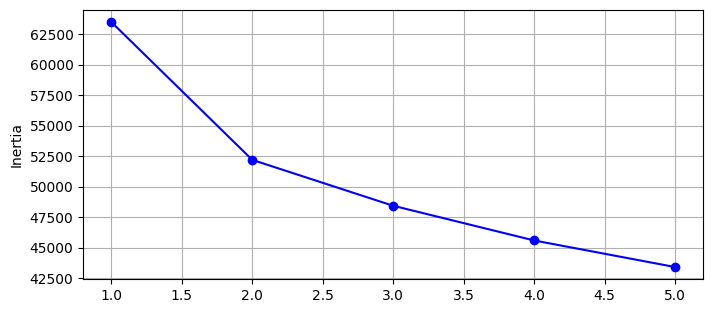

In [12]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 6), inertias_1, "bo-")
plt.xlabel("")
plt.ylabel("Inertia")
plt.grid()
plt.show()

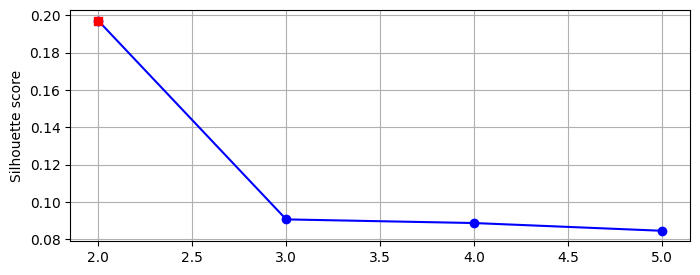

In [13]:
plt.figure(figsize=(8, 3))

k_range = range(2, 6)
best_index = np.argmax(silhouette_avgs)
best_k = k_range[best_index]
best_score = silhouette_avgs[best_index]

plt.plot(k_range, silhouette_avgs, "bo-")
plt.xlabel("")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels = kmeans.labels_


cluster_indices = {}
for i in range(2):
    cluster_indices[i] = []

for i, label in enumerate(cluster_labels):
    cluster_indices[label].append(y[i])


In [16]:
from collections import Counter

for key, value in cluster_indices.items():
    freq = Counter(value)
    print(key, ':', freq)


0 : Counter({'Small Cell': 43, 'Non-Small Cell': 12})
1 : Counter({'Non-Small Cell': 107, 'Small Cell': 6})


In [17]:
# using PCA to visualize the two clusters

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
labels = kmeans.labels_

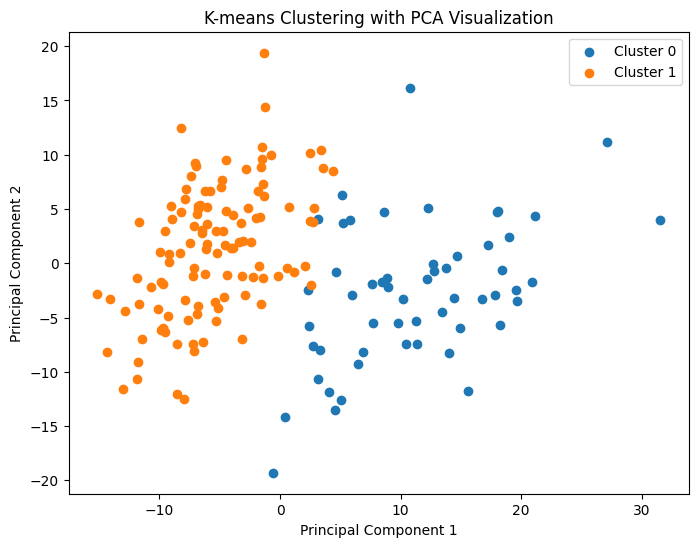

In [18]:
plt.figure(figsize=(8, 6))
x_range = (-20, 35)
y_range = (-25, 25)
for cluster_label in np.unique(labels):
    plt.scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

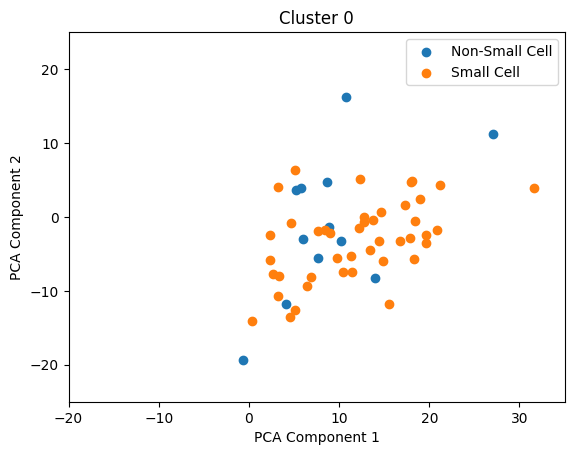

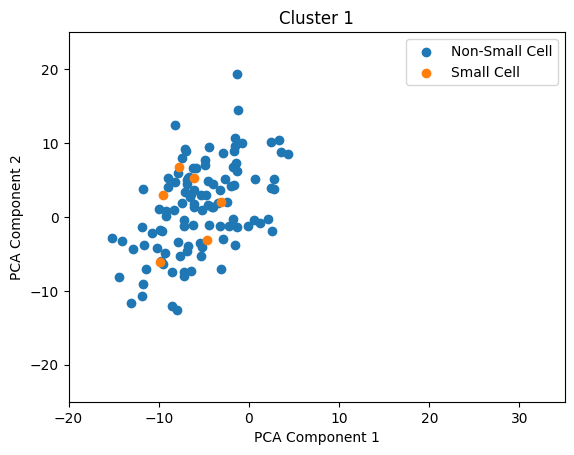

In [19]:
# Mapping classes to each cluster

x_range = (-20, 35)
y_range = (-25, 25)

unique_labels = np.unique(kmeans.labels_)

for label in unique_labels:
    plt.figure()
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'Cluster {label}')

    indices = np.where(kmeans.labels_ == label)

    for class_label in np.unique(data['lineage']):
        class_indices = np.where(data['lineage'].values[indices] == class_label)
        plt.scatter(X_pca[indices][class_indices, 0], X_pca[indices][class_indices, 1], label=f'{class_label}')
        print()

    plt.legend()
    plt.show()

## **Classification**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 735 entries, MIMAT0000062 to lineage
dtypes: float64(734), object(1)
memory usage: 964.8+ KB


In [21]:
# Check if any cell contains NaN
any_nan = data.isna().any().any()
any_nan

False

In [22]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.utils.class_weight import compute_class_weight

cv = 6

## **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

log_reg = LogisticRegression(class_weight=dict(zip(np.unique(y_train), class_weights)), max_iter=5000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.05, 0.1],
    'solver': ['liblinear', 'saga']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=6,
             estimator=LogisticRegression(class_weight={'Non-Small Cell': 0.7052631578947368,
                                                        'Small Cell': 1.7179487179487178},
                                          max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [27]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
log_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(log_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Mean Cross-Validation Score: 0.8949275362318839


In [28]:
y_pred = log_best_model.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  1],
       [ 2,  8]])

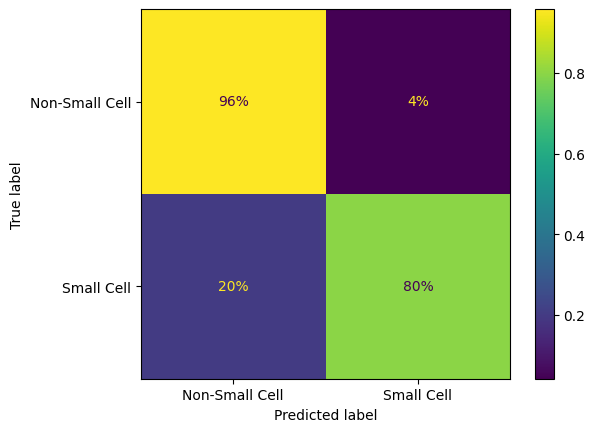

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.92      0.96      0.94        24
    Small Cell       0.89      0.80      0.84        10

      accuracy                           0.91        34
     macro avg       0.90      0.88      0.89        34
  weighted avg       0.91      0.91      0.91        34



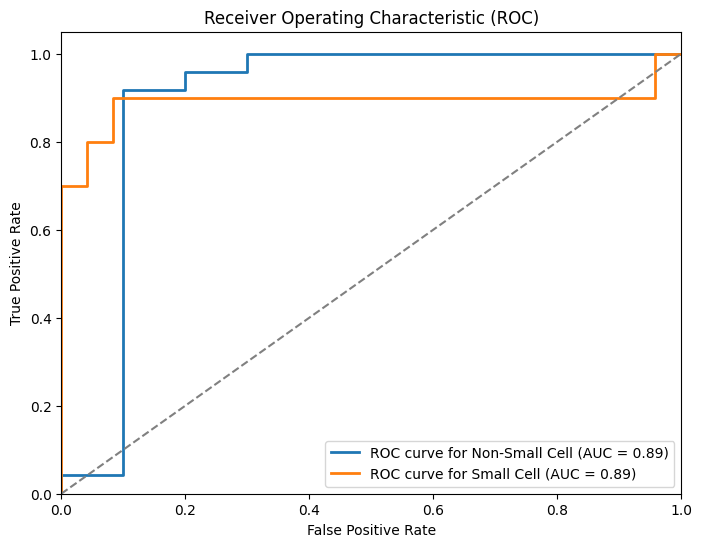

In [32]:
from sklearn.metrics import roc_curve, auc

## auc
y_prob = log_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## **SVC**

In [33]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced', probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

grid_search = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [34]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

svc_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(svc_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'C': 1, 'gamma': 0.001}
Mean Cross-Validation Score: 0.8955862977602108


In [35]:
y_pred = svc_best_model.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  1],
       [ 2,  8]])

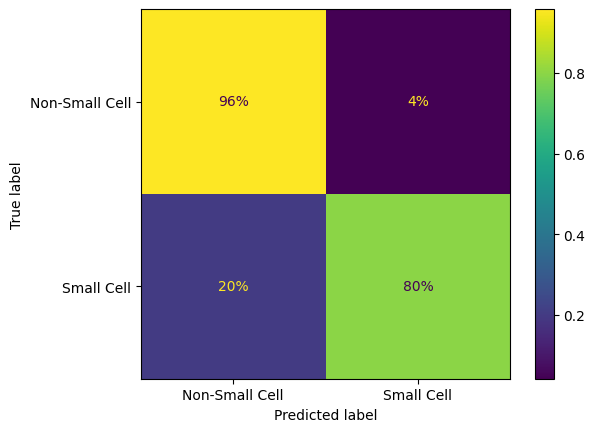

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [38]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.92      0.96      0.94        24
    Small Cell       0.89      0.80      0.84        10

      accuracy                           0.91        34
     macro avg       0.90      0.88      0.89        34
  weighted avg       0.91      0.91      0.91        34



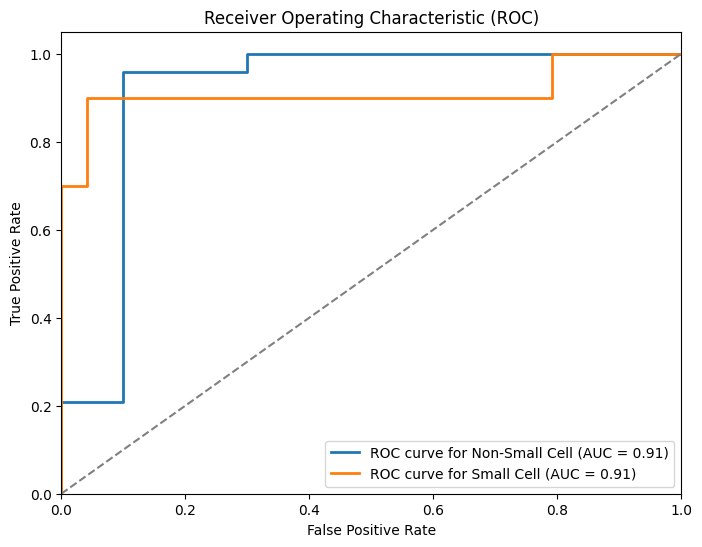

In [39]:
## auc

y_prob = svc_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## **RandomForest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [300, 500, 800],  # Number of trees in the forest
    'max_depth': [None, 10, 20],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 4, 8],     # Minimum number of samples required at each leaf node
}

# Perform grid search cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 500, 800]},
             scoring='accuracy')

In [41]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

rf_best_model = grid_search.best_estimator_
cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=cv)
print("Mean Cross-Validation Score:", cv_scores.mean())

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Mean Cross-Validation Score: 0.8949275362318841


In [42]:
y_pred = rf_best_model.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  1],
       [ 2,  8]])

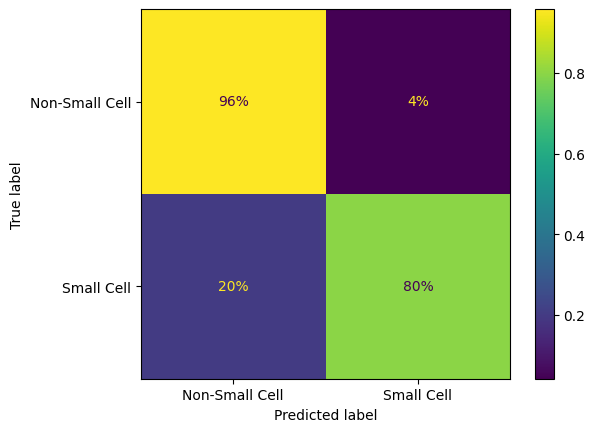

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")

In [45]:
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Non-Small Cell       0.92      0.96      0.94        24
    Small Cell       0.89      0.80      0.84        10

      accuracy                           0.91        34
     macro avg       0.90      0.88      0.89        34
  weighted avg       0.91      0.91      0.91        34



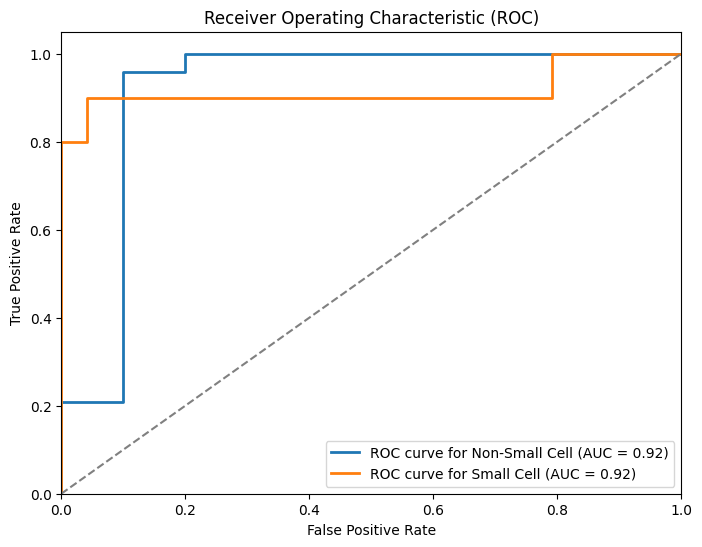

In [46]:
## auc

y_prob = rf_best_model.predict_proba(X_test)

class_labels = ['Non-Small Cell', 'Small Cell']

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(class_labels):
    y_true = (y_test == label)
    y_score = y_prob[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_true, y_score)
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(8, 6))
for label in class_labels:
    plt.plot(fpr[label], tpr[label], lw=2, label='ROC curve for {} (AUC = {:.2f})'.format(label, roc_auc[label]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## **Analysis of Predictive Features**

In [ ]:
importances = rf_best_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Cumulative sum of feature importances
cumulative_importances = np.cumsum(importances[sorted_indices])

# Find the number of features that account for 90% of prediction
num_features_90_percent = np.argmax(cumulative_importances >= 0.9) + 1

print("Of the 734 features, how many of these accounting for 90% of prediction:", num_features_90_percent)

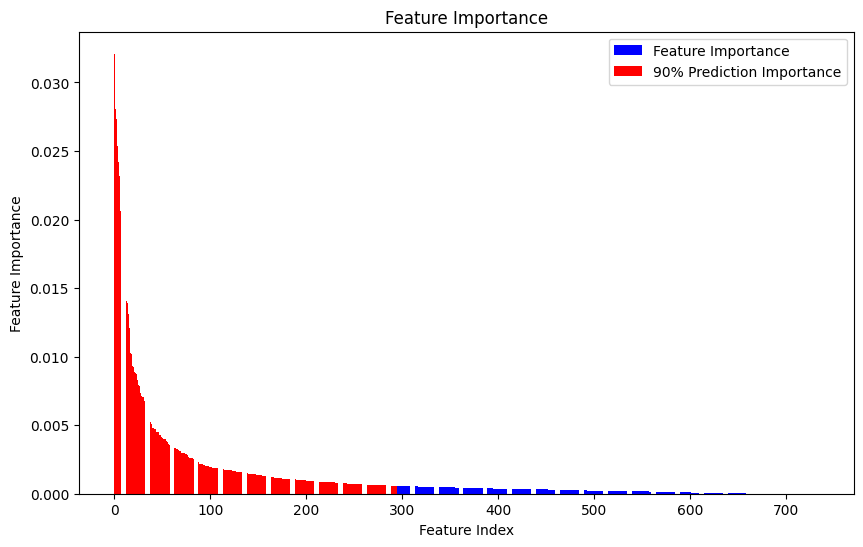

In [48]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center', color='blue', label='Feature Importance')

# Highlight the features that account for 90% of prediction
plt.bar(range(num_features_90_percent), importances[sorted_indices][:num_features_90_percent],
        align='center', color='red', label='90% Prediction Importance')

plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.legend()
plt.show()

In [49]:
# rank the features by importance
feature_order_by_importance = importances[sorted_indices]
feature_order_by_importance[:10]

array([0.03209891, 0.02806761, 0.0273603 , 0.02536749, 0.02418479,
       0.02318093, 0.02066004, 0.01925152, 0.01735533, 0.01586958])

In [50]:
# top 10 features that are important
X.columns[sorted_indices][:10]

Index(['MIMAT0000078', 'MIMAT0000772', 'MIMAT0000098', 'MIMAT0000100',
       'MIMAT0000084', 'MIMAT0000086', 'MIMAT0000279', 'MIMAT0000728',
       'MIMAT0002807', 'MIMAT0000428'],
      dtype='object')

In [51]:
df = data[X.columns[sorted_indices][:10]]

In [52]:
df['target'] = y

/tmp/ipykernel_34/2759295589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = y


In [53]:
df.head(3)

,MIMAT0000078,MIMAT0000772,MIMAT0000098,MIMAT0000100,MIMAT0000084,MIMAT0000086,MIMAT0000279,MIMAT0000728,MIMAT0002807,MIMAT0000428,target
0,9.523483,9.837596,6.262471,6.130931,8.630558,8.090219,6.383013,16.641300,6.383013,6.978653,Small Cell
1,8.663416,9.447909,6.209064,7.271463,9.148095,11.304745,5.913608,14.604454,6.192391,6.496015,Small Cell
2,7.546431,9.184628,6.335569,6.084489,6.225159,8.155780,7.849311,14.351975,5.997518,8.420971,Small Cell


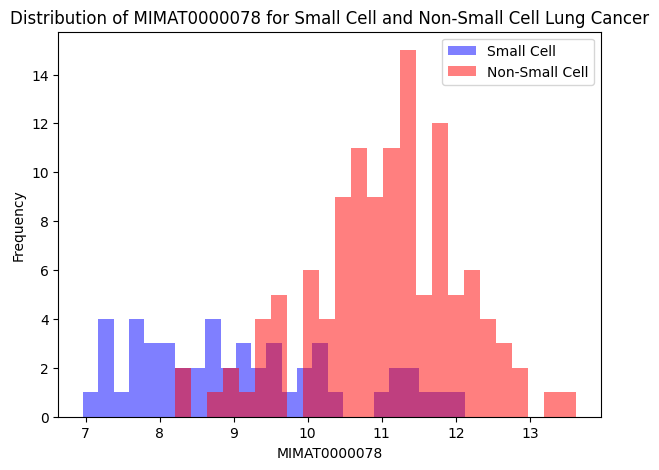

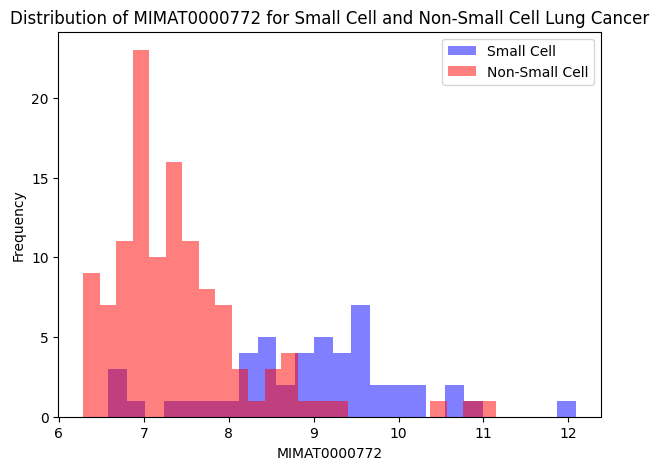

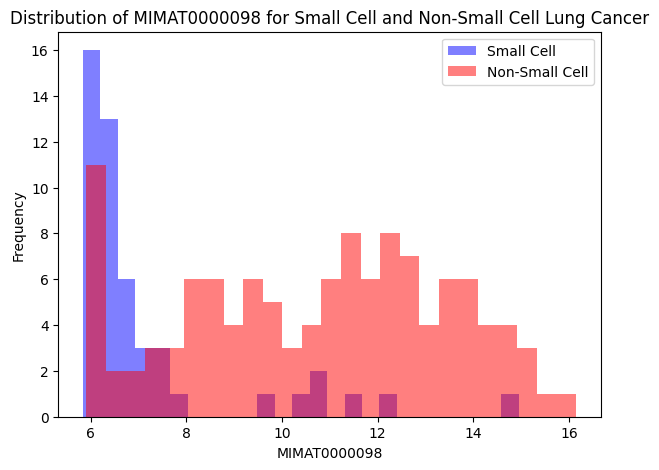

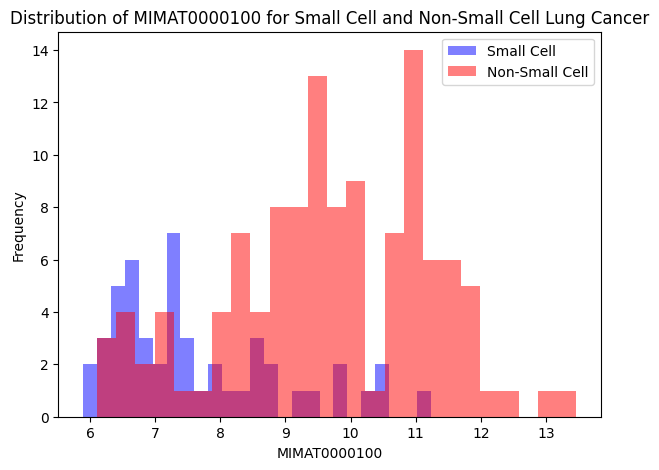

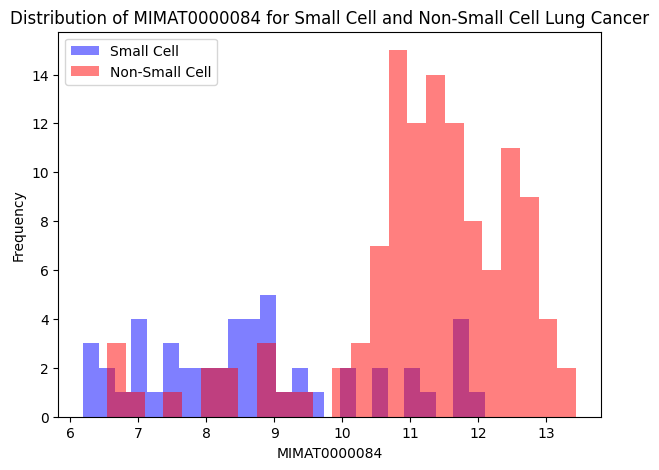

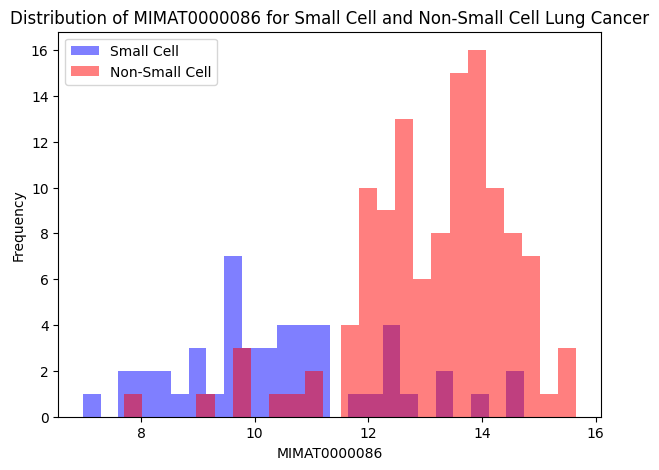

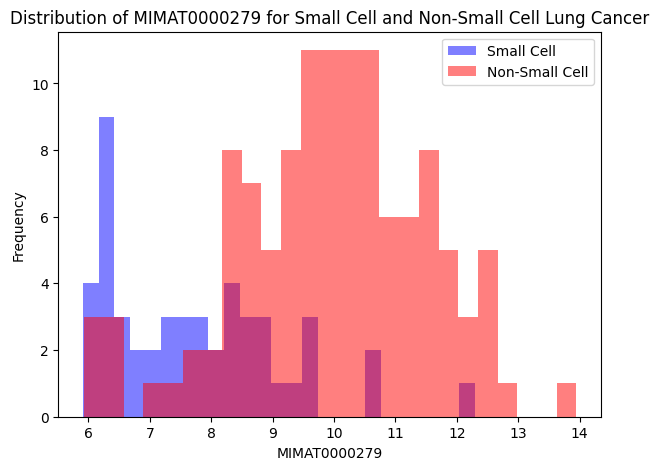

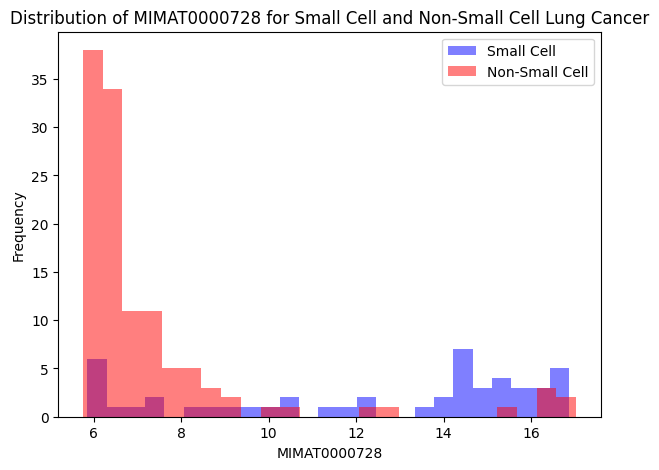

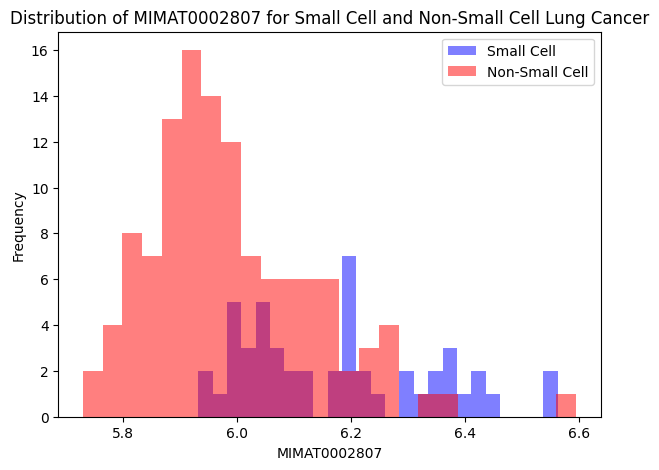

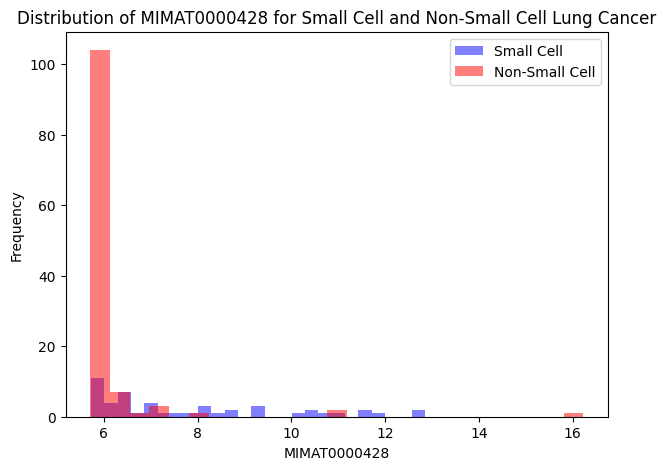

In [54]:
class_0_data = df[df['target'] == "Small Cell"].drop(columns=['target'])
class_1_data = df[df['target'] == "Non-Small Cell"].drop(columns=['target'])

# Plot histograms for each feature comparing the two classes
for feature in df.columns[:-1]:  # Exclude the target column from iteration
    plt.figure(figsize=(7, 5))
    plt.hist(class_0_data[feature], bins=25, alpha=0.5, label='Small Cell', color='blue')
    plt.hist(class_1_data[feature], bins=25, alpha=0.5, label='Non-Small Cell', color='red')
    plt.title(f'Distribution of {feature} for Small Cell and Non-Small Cell Lung Cancer')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    print()

From miRBase (www.mirbase.org/), the corresponding miRNA for several of the miRNA Identifiier recovered above.

In [55]:
miRNA_data = {
    'MIMAT0000078' : 'hsa-miR-23a-3p',
    'MIMAT0000772' : 'hsa-miR-345-5p',
    'MIMAT0000098' : 'hsa-miR-100-5p',
    'MIMAT0000100': 'hsa-miR-375-3p',
    'MIMAT0000084' : 'hsa-mir-27a',
    'MIMAT0000086' : 'hsa-miR-29a-3p',
    'MIMAT0000279' : 'hsa-miR-222-3p',
    'MIMAT0000728': 'hsa-miR-375-3p',
    'MIMAT0002807' : 'hsa-miR-29a-3p',
    'MIMAT0000428' : 'hsa-miR-135a-5p',
}

table = pd.DataFrame(list(miRNA_data.items()), columns=['miRNA Identifier', 'miRNA'])
table

,miRNA Identifier,miRNA
0,MIMAT0000078,hsa-miR-23a-3p
1,MIMAT0000772,hsa-miR-345-5p
2,MIMAT0000098,hsa-miR-100-5p
3,MIMAT0000100,hsa-miR-375-3p
4,MIMAT0000084,hsa-mir-27a
5,MIMAT0000086,hsa-miR-29a-3p
6,MIMAT0000279,hsa-miR-222-3p
7,MIMAT0000728,hsa-miR-375-3p
8,MIMAT0002807,hsa-miR-29a-3p
9,MIMAT0000428,hsa-miR-135a-5p


## **Neural Network**

### Addendum

We explore if neural network classification will perform better than the three approaches above.

In [56]:
import sys
assert sys.version_info >= (3, 7)

In [57]:
from packaging import version
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

2025-09-12 09:43:37.824229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-12 09:43:37.824386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-12 09:43:38.136989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [59]:
y_train = y_train.apply(lambda x: 0 if x == "Non-Small Cell" else 1)
y_test = y_test.apply(lambda x: 0 if x == "Non-Small Cell" else 1)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [63]:
X_train.shape

(134, 734)

In [64]:
model = Sequential()

model.add(Dense(units=743,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy', metrics=["accuracy"])


In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [66]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.6250 - loss: 0.6376

I0000 00:00:1757670241.613127     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1757670241.625445     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6000 - loss: 0.6702 

W0000 00:00:1757670246.364167     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6020 - loss: 0.6693 - val_accuracy: 0.7059 - val_loss: 0.5961
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5743 - loss: 0.7786 - val_accuracy: 0.7353 - val_loss: 0.5365
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6900 - loss: 0.5896 - val_accuracy: 0.7059 - val_loss: 0.5516
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6359 - loss: 0.7149 - val_accuracy: 0.7353 - val_loss: 0.5689
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6403 - loss: 0.6317 - val_accuracy: 0.8824 - val_loss: 0.5514
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6241 - loss: 0.6328 - val_accuracy: 0.7353 - val_loss: 0.4934
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6894 - loss: 0.5669 - val_accuracy: 0.8235 - val_loss: 0.4364
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7870 - loss: 0.4455 - val_accuracy: 0.8824 - val_loss: 0.3868
Epoch 9/100


<Axes: >

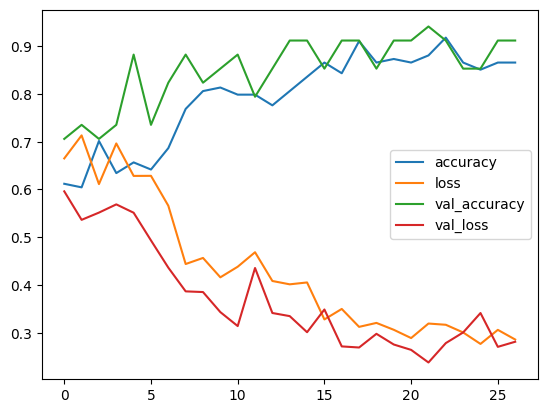

In [67]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [68]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


W0000 00:00:1757670248.777496     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.89      0.80      0.84        10

    accuracy                           0.91        34
   macro avg       0.90      0.88      0.89        34
weighted avg       0.91      0.91      0.91        34

